In [1]:
!pip install easyocr imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=5e4e71f89973f712399551af7516f6c2c825b28867be9b0742080963015faa8c
  Stored in directory: c:\users\dinor\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [2]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr

### Read an image, Grayscale and BLUR

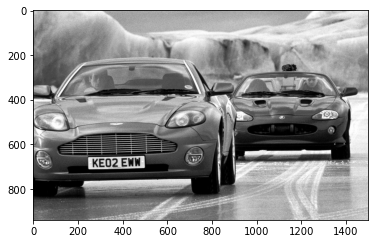

In [53]:
img = cv2.imread('image5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Apply filter and find edges for localization

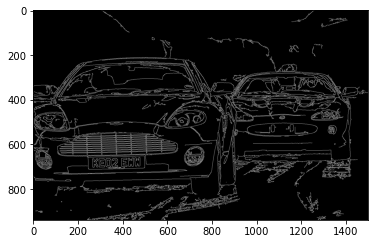

In [54]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) # Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Find Contours and Apply Mask

In [55]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [56]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [57]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)

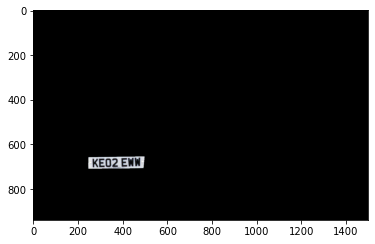

In [58]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [59]:
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]

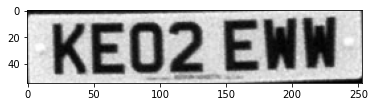

In [60]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### Use Easy OCR to ReadText

In [61]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[11, 0], [243, 0], [243, 55], [11, 55]], 'KEO2 ENH', 0.17360154882443682)]

### Render Result

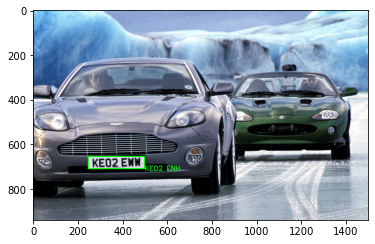

In [62]:
text = result[0][-2]
font= cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0),thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
